In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# File to Load (Remember to change these)
data_csv = "../who_suicide_statistics.csv"

# Read the csv
data = pd.read_csv(data_csv)

In [3]:
# Clean data
data.dropna(how='any', inplace=True)

data = data[data.suicides_no != 0]
data.reset_index(inplace=True)
data.drop(columns={'index'}, inplace=True)
data.head(20)

,country,year,sex,age,suicides_no,population
0,Albania,1987,female,15-24 years,14.0,289700.0
1,Albania,1987,female,25-34 years,4.0,257200.0
2,Albania,1987,female,35-54 years,6.0,278800.0
3,Albania,1987,female,75+ years,1.0,35600.0
4,Albania,1987,male,15-24 years,21.0,312900.0
5,Albania,1987,male,25-34 years,9.0,274300.0
6,Albania,1987,male,35-54 years,16.0,308000.0
7,Albania,1987,male,55-74 years,1.0,137500.0
8,Albania,1987,male,75+ years,1.0,21800.0
9,Albania,1988,female,15-24 years,8.0,295600.0


In [4]:
data['suicides_no']=data['suicides_no'].astype('int')
data['population']=data['population'].astype('int')

data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1987,female,15-24 years,14,289700
1,Albania,1987,female,25-34 years,4,257200
2,Albania,1987,female,35-54 years,6,278800
3,Albania,1987,female,75+ years,1,35600
4,Albania,1987,male,15-24 years,21,312900


In [5]:
# groupby total per gender
sex_group = data.groupby('sex')

sex_gp_df = pd.DataFrame(sex_group.sum())
sex_gp_df.drop(columns={'year','population'}, inplace=True)
sex_gp_df['suicides_no'] = sex_gp_df['suicides_no'].astype('int')
sex_gp_df

,suicides_no
sex,
female,1894294
male,6104173


In [28]:
#gropby total per age group
#usable for bar chart
age_group = data.groupby(['age', 'sex'])

age_gp_df = pd.DataFrame(age_group.sum())
age_gp_df.drop(columns={'year','population'}, inplace=True)
age_gp_df['suicides_no'] = age_gp_df['suicides_no'].astype('int')
age_gp_df.reset_index(inplace=True)
age_gp_df

,age,sex,suicides_no
0,15-24 years,female,218309
1,15-24 years,male,757391
2,25-34 years,female,256427
3,25-34 years,male,1104353
4,35-54 years,female,607420
5,35-54 years,male,2280320
6,5-14 years,female,20152
7,5-14 years,male,42168
8,55-74 years,female,528359
9,55-74 years,male,1426791


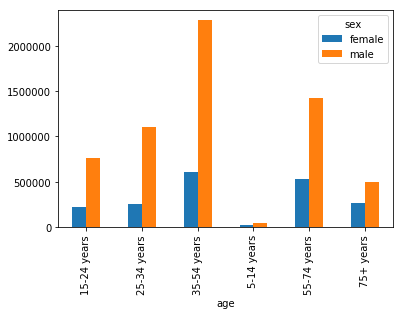

In [30]:
#Bar chart for suicides by age group
ax = age_gp_df.pivot(index='age',columns='sex', values='suicides_no').plot(kind='bar')

In [7]:
#group by countries
cn_group = data.groupby('country')

cn_sum=cn_group.sum()

cn_sum.sort_values(by='suicides_no',ascending=False, inplace=True)
cn_sum.drop(columns={'population','year'}, inplace=True)
cn_sum.head(10)

,suicides_no
country,
Russian Federation,1500992.0
United States of America,1201401.0
Japan,937614.0
France,395500.0
Ukraine,365170.0
Germany,291262.0
Republic of Korea,261730.0
Brazil,250824.0
Poland,172562.0


In [8]:
#groups by year
year_group = data.groupby(['year','sex'])

yeardf=year_group.sum()
yeardf.drop(columns={'population'},inplace=True)

yeardf.head()

suicides_no
year sex                
1979 female        29418
     male          63372
1980 female        42629
     male         110771
1981 female        47448

In [9]:
#scatter total number each country each year
cy_group = data.groupby(['year','country'])

cy_group.sum()

suicides_no  population
year country                                          
1979 Argentina                        1802    24986000
     Australia                        1675    13279400
     Barbados                            2       36500
     Belgium                          2114     9249500
     Brazil                           3459   102206100
     Canada                           3355    21908000
     Ecuador                           242     5461000
     France                           9993    49805300
     French Guiana                       9       27000
     Greece                            277     8741300
     Guatemala                          89     3571766
     Hong Kong SAR                     661     4056500
     Hungary                          4767     9828100
     Ireland                           193     2689700
     Israel                            249     2930600
     Italy                            3970    53067000
     Japan                           20711   107268500
     Kuwait                              4      410100
     Luxembourg                         73      291600
     Mexico                           1092    56305934
     Netherlands                      1465    12013200
     New Zealand                       302     2257300
     Panama                             30      932000
     Paraguay                           41     1750606
     Puerto Rico                       274     2415000
     Saint Lucia                         1        7600
     Singapore                         246     2162700
     Suriname                           49      316389
     Thailand                         3047    40192674
     Trinidad and Tobago                55      691539
...                                    ...         ...
2015 Slovenia                          422     1859042
     South Africa                      482    49627460
     Spain                            3604    44186528
     Sweden                           1182     9114524
     Switzerland                      1073     7892502
     Thailand                         4205    61261276
     Turkey                           1532    71880464
     Turkmenistan                      133     4349716
     Ukraine                          7574    40345446
     United Kingdom                   4910    61082942
     United States of America        44189   300078511
     Uruguay                           630     3190795
     Virgin Islands (USA)                3       17125
2016 Armenia                            67     2400033
     Austria                          1204     8319211
     Croatia                           683     3567043
     Cyprus                             36      622053
     Czech Republic                   1318     8929942
     Hungary                          1762     8885614
     Iceland                            40      191318
     Lithuania                         826     2584574
     Mauritius                          98      966134
     Mongolia                          450     2698164
     Netherlands                      1895    16155753
     Qatar                              70     2199243
     Republic of Moldova               546     3362300
     Rodrigues                           8       14433
     Romania                          1969    18743783
     Sweden                           1135     9253843
     Thailand                         4131    61333728

[2920 rows x 2 columns]